In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import yfinance as yf

/var/folders/n3/ctf3v0y55glcnmf2kr8gnjp40000gn/T/ipykernel_38892/3701717772.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/manishrambalimaurya/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
aapl = yf.Ticker("AAPL")
df = aapl.history(start="2020-01-01", end="2023-05-07")

In [3]:
train_size = int(len(df) * 0.8)
X_train = df.index[:train_size].values.reshape(-1, 1)
X_test = df.index[train_size:].values.reshape(-1, 1)
y_train = df['Close'][:train_size].values
y_test = df['Close'][train_size:].values


In [4]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)


KNeighborsRegressor()

In [5]:
y_pred = model.predict(X_test)

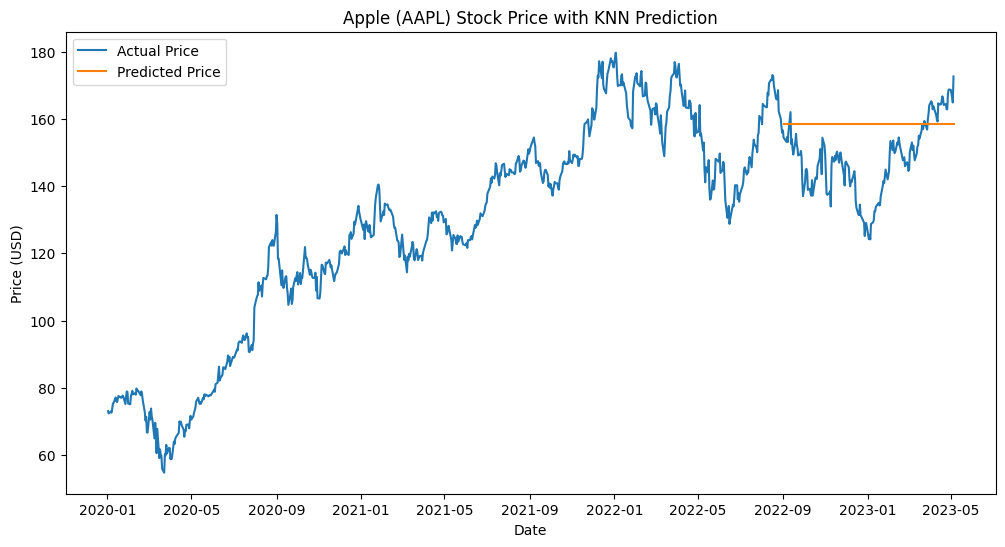

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.plot(df.index[train_size:], y_pred)
plt.title('Apple (AAPL) Stock Price with KNN Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(['Actual Price', 'Predicted Price'])
plt.show()

In [7]:
next_day_price = model.predict([[len(df)]])[0]
print(f"Predicted next day's price: {next_day_price:.2f}")

Predicted next day's price: 72.93
